# Actividad - Ecuaciones diferenciales

In [1]:
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

1. Resolver numéricamente con `solve_ivp` la siguiente ecuación diferencial:
$$\frac{dx}{dt}=\frac{x}{t+1}$$

In [2]:
def f (t,x):
    return x/(t+1)

t = np.linspace(0, 50, 500)

tspan = [0,100]
x0=np.array([2])
x=solve_ivp(f,tspan,x0) 
x

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 26
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([  0.        ,   0.10001   ,   1.10010998,  11.10110978,
       100.        ])
 t_events: None
        y: array([[  2.        ,   2.20002   ,   4.20021996,  24.20221956,
        202.        ]])
 y_events: None

Grafique con condición inicial $x_0 = 2$

In [4]:
x.t

array([  0.        ,   0.10001   ,   1.10010998,  11.10110978,
       100.        ])

In [7]:
x.y[0, :] #(vector)

array([  2.        ,   2.20002   ,   4.20021996,  24.20221956,
       202.        ])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


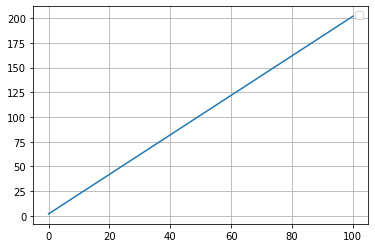

In [6]:
plt.figure()
plt.plot(x.t, x.y[0, :])
plt.legend(loc="best")
plt.grid()

2. Encuentre la solución numérica para un oscilador armónico simple:

$$
\frac{d^2 x}{dt^2} +  \omega_{0}^2 x = 0.
$$
Donde $x_0=0.5$, $\dot{x}_0=0.1$ y $\omega_0=3$.

2.1 Defina una función, cuyos argumentos de entrada sean:


1. el tiempo $t$,
2. el arreglo $[x,\dot{x}]$.

Y la salida:

1. el arreglo $[\dot{x},\ddot{x}]$.

  Considerando el argumento de la frecuencia natural $\omega_0$ debe ser una variable global.

In [15]:
def dx(t, x):
    return [x[1], -w0**2*x[0]]

In [16]:
w0 = 3
xi = np.array([0.5,0.1])
tspan = [0,10]

x1 = solve_ivp(dx, tspan, xi, max_step=0.1)
x1

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 608
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([ 0.        ,  0.03155236,  0.13155236,  0.23155236,  0.33155236,
        0.43155236,  0.53155236,  0.63155236,  0.73155236,  0.83155236,
        0.93155236,  1.03155236,  1.13155236,  1.23155236,  1.33155236,
        1.43155236,  1.53155236,  1.63155236,  1.73155236,  1.83155236,
        1.93155236,  2.03155236,  2.13155236,  2.23155236,  2.33155236,
        2.43155236,  2.53155236,  2.63155236,  2.73155236,  2.83155236,
        2.93155236,  3.03155236,  3.13155236,  3.23155236,  3.33155236,
        3.43155236,  3.53155236,  3.63155236,  3.73155236,  3.83155236,
        3.93155236,  4.03155236,  4.13155236,  4.23155236,  4.33155236,
        4.43155236,  4.53155236,  4.63155236,  4.73155236,  4.83155236,
        4.93155236,  5.03155236,  5.13155236,  5.23155236,  5.33155236,
        5.43155236,  5.531552

Grafique

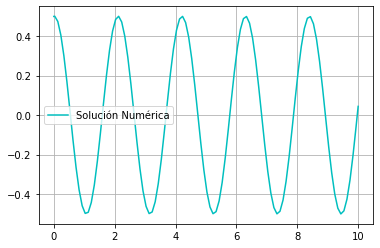

In [27]:
plt.figure()
plt.plot(x1.t, x1.y[0,:], 'c', label='Solución Numérica')
plt.legend(loc='best')
plt.grid()

Asigne a los parámetros de la solución analítica $C_1=x_0$ y $C_2=\frac{\dot{x}_0}{\omega_0}$.

In [28]:
def analitica(t, w0, th0, v0):
    return th0*np.cos(w0*t)+(v0/w0)*np.sin(w0*t)

a = analitica(x1.t, w0, 0.5, 0.1)

Redefina la función para graficarla (con la palabra reservada ***def***) en un intervalo de tiempo de 0 a 10 segundos. Comparela en un mismo grafico con la solución numérica obtenida.

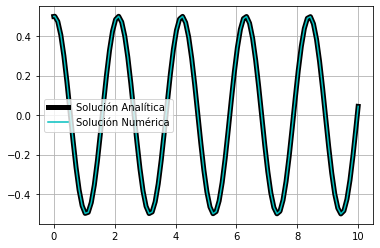

In [29]:
plt.figure()
plt.plot(x1.t, a, "k", lw = 5,label = 'Solución Analítica')
plt.plot(x1.t, x1.y[0,:], 'c', label='Solución Numérica')
plt.legend(loc='best')
plt.grid()